# APSC-5984 Lab 6: Tidy Data

Due: 2023-02-27 (Monday) 23:59:59



## 0. Overview

Tidy data is an important concept in data science. We will go through each type of messy data discussed in the paper [Tidy Data](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf) and learn how to tidy them. We will not only use the `pandas` library to manipulate dataframes, but also use `plotnine`, which is a Python implementation of the `ggplot2` library in R, to visualize the tidy data.

First, let's import the libraries we will use in this section.


In [1]:
import pandas as pd
import numpy as np
import re
import os
from plotnine import *
os.chdir("data")
pd.set_option("display.notebook_repr_html", False)

## 1. Column headers are values, not variable names

### 1.1 United States Census Bureau: 2017 National Population Projection

This is a dataset describing the projected population of the United States from 2016 to 2060. The first column `YEAR` keeps the year of the project. The remaining columns `POP_X` were used to store the projected population of each age `X` in the year, where `X` is an integer from 0 to 100.

In [11]:
data = pd.read_csv("tidy_1_pop.csv")
data

    YEAR    POP_0    POP_1    POP_2    POP_3    POP_4    POP_5    POP_6  \
0   2016  3970145  3995008  3992154  3982074  3987656  4032515  4029655   
1   2017  4054035  3982964  4008116  4003478  3992207  3997392  4042440   
2   2018  4075563  4068172  3995888  4019345  4013649  4001995  4007421   
3   2019  4095614  4089881  4082231  4006967  4029427  4023461  4012057   
4   2020  4113164  4110117  4104058  4094281  4016919  4039164  4033531   
5   2021  4127525  4127842  4124416  4116205  4105035  4026556  4049172   
6   2022  4139039  4142382  4142254  4136660  4127020  4115321  4036489   
7   2023  4147758  4154076  4156909  4154588  4147538  4137347  4125778   
8   2024  4154108  4162971  4168717  4169332  4165525  4157904  4147828   
9   2025  4158795  4169495  4177722  4181225  4180328  4175929  4168415   
10  2026  4162506  4174374  4184383  4190355  4192326  4190821  4186520   
11  2027  4165252  4178275  4189406  4197138  4201555  4202913  4201498   
12  2028  4166643  418121

We can use `pd.melt()` to tidy the dataset. The `id_vars` argument specifies the columns that should not be melted. The `value_vars` argument specifies the columns that should be melted. In our case, `YEAR` is `id_vars` and the remaing columns are `value_vars`. We can specify the names of the melted columns using the `var_name` and `value_name` arguments.

In [4]:
data_long = pd.melt(data,
                id_vars=["YEAR"],
                var_name="age",
                value_name="pop")
data_long

      YEAR      age      pop
0     2016    POP_0  3970145
1     2017    POP_0  4054035
2     2018    POP_0  4075563
3     2019    POP_0  4095614
4     2020    POP_0  4113164
...    ...      ...      ...
4540  2056  POP_100   505951
4541  2057  POP_100   529280
4542  2058  POP_100   549748
4543  2059  POP_100   567379
4544  2060  POP_100   589382

[4545 rows x 3 columns]

By specifying the `value_vars` argument, we can only melt the columns we want.

In [5]:
data_long = pd.melt(data,
                id_vars=["YEAR"],
                value_vars=["POP_1", "POP_2", "POP_3"],
                var_name="age",
                value_name="pop")
data_long

     YEAR    age      pop
0    2016  POP_1  3995008
1    2017  POP_1  3982964
2    2018  POP_1  4068172
3    2019  POP_1  4089881
4    2020  POP_1  4110117
..    ...    ...      ...
130  2056  POP_3  4401231
131  2057  POP_3  4411893
132  2058  POP_3  4421774
133  2059  POP_3  4430923
134  2060  POP_3  4439404

[135 rows x 3 columns]

We can use `str.split()` to remove the prefix `POP_` from the `age` column.

In [8]:
data_long["age"] = data_long["age"].apply(lambda x: x.split("_")[1])
data_long

     YEAR age      pop
0    2016   1  3995008
1    2017   1  3982964
2    2018   1  4068172
3    2019   1  4089881
4    2020   1  4110117
..    ...  ..      ...
130  2056   3  4401231
131  2057   3  4411893
132  2058   3  4421774
133  2059   3  4430923
134  2060   3  4439404

[135 rows x 3 columns]

### 1.2 Billboard top hits for 2000

This dataset contains the song information of the top hits in 2000 and their rank by week. The ranks were organized in multiple columns (e.g., x1st.week, x2nd.week), where each column represents the rank of the song in a week.

In [12]:
data = pd.read_csv("tidy_2_bboard.csv")
data

     year      artist.inverted                                  track   time  \
0    2000      Destiny's Child               Independent Women Part I  03:38   
1    2000              Santana                           Maria, Maria  04:18   
2    2000        Savage Garden                     I Knew I Loved You  04:07   
3    2000              Madonna                                  Music  03:45   
4    2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  03:38   
..    ...                  ...                                    ...    ...   
312  2000     Ghostface Killah                       Cherchez LaGhost  03:04   
313  2000          Smith, Will                            Freakin' It  03:58   
314  2000        Zombie Nation                          Kernkraft 400  03:30   
315  2000       Eastsidaz, The                               Got Beef  03:58   
316  2000               Fragma                         Toca's Miracle  03:22   

    genre date.entered date.peaked  x1s

Again, let's identify the `id_vars` and `value_vars`. The `id_vars` are `year`, `artist.inverted`, `track`, `time`, `genre`, `date.entered`, and `date.peaked`. The `value_vars` are the remaining columns.

In [38]:
id_vars = data.columns[:7]
data_long = data.melt(id_vars=id_vars, var_name="week", value_name="rank")
data_long = data_long.dropna()
data_long

       year      artist.inverted                                  track  \
0      2000      Destiny's Child               Independent Women Part I   
1      2000              Santana                           Maria, Maria   
2      2000        Savage Garden                     I Knew I Loved You   
3      2000              Madonna                                  Music   
4      2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)   
...     ...                  ...                                    ...   
19663  2000             Lonestar                                 Amazed   
19700  2000                Creed                                 Higher   
19980  2000             Lonestar                                 Amazed   
20017  2000                Creed                                 Higher   
20334  2000                Creed                                 Higher   

        time    genre date.entered date.peaked        week  rank  
0      03:38     Rock      9/23/

Refine the `week` column by removing the prefix `x` and the suffix `.week`.

In [39]:
data_long["week"] = data_long["week"].apply(lambda x: re.findall(r"\d+", x)[0]).astype(int)
data_long["rank"] = data_long["rank"].astype(int)
data_long

       year      artist.inverted                                  track  \
0      2000      Destiny's Child               Independent Women Part I   
1      2000              Santana                           Maria, Maria   
2      2000        Savage Garden                     I Knew I Loved You   
3      2000              Madonna                                  Music   
4      2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)   
...     ...                  ...                                    ...   
19663  2000             Lonestar                                 Amazed   
19700  2000                Creed                                 Higher   
19980  2000             Lonestar                                 Amazed   
20017  2000                Creed                                 Higher   
20334  2000                Creed                                 Higher   

        time    genre date.entered date.peaked  week  rank  
0      03:38     Rock      9/23/00    

## 2. Multiple variables are stored in one column

### 2.1 Tuberculosis (TB) dataset

This is a dataset describing the number of tuberculosis cases in different countries (column `country`) and years (column `year`). The remaining columns were coded in a format of `new_sp_xyyyy` where `x` is the gender and `yyyy` is numeric age range. For example, `new_sp_m014` kept the TB cases of male patients in the age range of 0-14.

In [40]:
data = pd.read_csv("tidy_3_tb.csv")
data

     country  year   new_sp  new_sp_m04  new_sp_m514  new_sp_m014  \
0         AD  1989      NaN         NaN          NaN          NaN   
1         AD  1990      NaN         NaN          NaN          NaN   
2         AD  1991      NaN         NaN          NaN          NaN   
3         AD  1992      NaN         NaN          NaN          NaN   
4         AD  1993     15.0         NaN          NaN          NaN   
...      ...   ...      ...         ...          ...          ...   
5764      ZW  2004  14581.0         NaN          NaN        187.0   
5765      ZW  2005  13155.0         NaN          NaN        210.0   
5766      ZW  2006  12718.0         NaN          NaN        215.0   
5767      ZW  2007  10583.0         6.0        132.0        138.0   
5768      ZW  2008   9830.0         NaN          NaN        127.0   

      new_sp_m1524  new_sp_m2534  new_sp_m3544  new_sp_m4554  ...  new_sp_f04  \
0              NaN           NaN           NaN           NaN  ...         NaN   
1        

Let's first tidy the columns of TB cases.

In [43]:
data_long = data.melt(id_vars=["country", "year"]).dropna()
data_long

       country  year   variable  value
4           AD  1993     new_sp   15.0
5           AD  1994     new_sp   24.0
6           AD  1996     new_sp    8.0
7           AD  1997     new_sp   17.0
8           AD  1998     new_sp    1.0
...        ...   ...        ...    ...
120964      VU  2008  new_sp_fu    0.0
121038      YE  2008  new_sp_fu    0.0
121092      ZA  2008  new_sp_fu    0.0
121119      ZM  2008  new_sp_fu    0.0
121148      ZW  2008  new_sp_fu    0.0

[38619 rows x 4 columns]

Remove redundant columns.

In [57]:
data_long2 = data_long.query("variable not in ['new_sp', 'new_sp_mu', 'new_sp_fu']")
data_long2

       country  year    variable  value
5784        AD  2005  new_sp_m04    0.0
5785        AD  2006  new_sp_m04    0.0
5787        AD  2008  new_sp_m04    0.0
5811        AE  2006  new_sp_m04    0.0
5812        AE  2007  new_sp_m04    0.0
...        ...   ...         ...    ...
115375      ZW  2004  new_sp_f65  111.0
115376      ZW  2005  new_sp_f65  603.0
115377      ZW  2006  new_sp_f65   96.0
115378      ZW  2007  new_sp_f65   90.0
115379      ZW  2008  new_sp_f65  105.0

[35009 rows x 4 columns]

Then, format the `variable` column to `gender` and `age`. 

In [75]:
data_long2["age"] = data_long2["variable"].\
    apply(lambda x: re.findall(r"\d+", x.replace("new_sp_", ""))[0])
data_long2["gender"] = data_long2["variable"].\
    apply(lambda x: re.findall(r"[mf]+", x.replace("new_sp_", ""))[0])

/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_14115/1936559116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_14115/1936559116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [76]:
data_long2

       country  year    variable  value age gender
5784        AD  2005  new_sp_m04    0.0  04      m
5785        AD  2006  new_sp_m04    0.0  04      m
5787        AD  2008  new_sp_m04    0.0  04      m
5811        AE  2006  new_sp_m04    0.0  04      m
5812        AE  2007  new_sp_m04    0.0  04      m
...        ...   ...         ...    ...  ..    ...
115375      ZW  2004  new_sp_f65  111.0  65      f
115376      ZW  2005  new_sp_f65  603.0  65      f
115377      ZW  2006  new_sp_f65   96.0  65      f
115378      ZW  2007  new_sp_f65   90.0  65      f
115379      ZW  2008  new_sp_f65  105.0  65      f

[35009 rows x 6 columns]

## 3. Variables are stored in both rows and columns

This is a scenario where variables are stored in both rows and columns. We will work on the `weather` dataset to demonstrate how to tidy this type of data. Since this dataset did not have a column header, we will use the `columns` attribute to specify the column names.

In [87]:
data = pd.read_csv("tidy_4_weather.csv", header=None)
nrow, ncol = data.shape
data.columns = ["idx"] + [i for i in range(1, ncol)]
data

                       idx    1    2    3    4    5    6    7    8    9  ...  \
0    MX000017004195504TMIN  150  150  160  150  160  160  160  160  160  ...   
1    MX000017004195504PRCP    0    0    0    0    0    0    0    0    0  ...   
2    MX000017004195505TMAX  310  310  310  300  300  300  310  310  310  ...   
3    MX000017004195505TMIN  200  160  160  150  150  150  160  160  170  ...   
4    MX000017004195505PRCP    0    0    0    0    0    0    0    0    0  ...   
..                     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
994  MX000017004199004TMIN    0  147  147  150  136    0  157    0    0  ...   
995  MX000017004199004PRCP    0    0    0    0   23    0    0    0    0  ...   
996  MX000017004199005TMAX    0  350  362  348  337    0  240    0    0  ...   
997  MX000017004199005TMIN  168  168  167  167  170    0  132  132    0  ...   
998  MX000017004199005PRCP    0    0    0    0   61    0  254   20    0  ...   

      22   23   24   25   26   27   28 

You should notice that the column `idx` contains complicated information: `station ID`, `year`, `month`, and `day`. We can use simple indexing to extract the information we want.

In [88]:
data["site"] = data["idx"].apply(lambda x: x[:11])
data["year"] = data["idx"].apply(lambda x: x[-10:-6]).astype(int)
data["month"] = data["idx"].apply(lambda x: x[-6:-4]).astype(int)
data["variable"] = data["idx"].apply(lambda x: x[-4:])
data = data.drop("idx", axis=1)
data

       1    2    3    4    5    6    7    8    9   10  ...   26   27   28  \
0    150  150  160  150  160  160  160  160  160  170  ...  190  190  170   
1      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2    310  310  310  300  300  300  310  310  310  300  ...  310  310  320   
3    200  160  160  150  150  150  160  160  170  170  ...  180  160  150   
4      0    0    0    0    0    0    0    0    0    0  ...    0  142    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
994    0  147  147  150  136    0  157    0    0  157  ...    0    0    0   
995    0    0    0    0   23    0    0    0    0    0  ...    0    0    0   
996    0  350  362  348  337    0  240    0    0    0  ...    0    0    0   
997  168  168  167  167  170    0  132  132    0    0  ...  155    0    0   
998    0    0    0    0   61    0  254   20    0    5  ...    0    0    0   

      29   30   31         site  year  month  variable  
0    180  160    0

Now, let's tidy the date information.

In [94]:
data2 = data.melt(id_vars=["site", "year", "month", "variable"],
                  var_name="day", value_name="value")
data2["day"] = data2["day"].astype(int)
data2

              site  year  month variable  day  value
0      MX000017004  1955      4     TMIN    1    150
1      MX000017004  1955      4     PRCP    1      0
2      MX000017004  1955      5     TMAX    1    310
3      MX000017004  1955      5     TMIN    1    200
4      MX000017004  1955      5     PRCP    1      0
...            ...   ...    ...      ...  ...    ...
30964  MX000017004  1990      4     TMIN   31      0
30965  MX000017004  1990      4     PRCP   31      0
30966  MX000017004  1990      5     TMAX   31    336
30967  MX000017004  1990      5     TMIN   31    169
30968  MX000017004  1990      5     PRCP   31      3

[30969 rows x 6 columns]

Now, since there are three variables: `tmax`, `tmin`, and `prcp` in the `variable` column, we need to pivot it to the column names.

We can use `df.pivot()` to do this. The `index` argument specifies the columns that should not be pivoted. The `columns` argument specifies the columns that should be pivoted. The `values` argument specifies the column that should be used as the values of the pivoted columns.

In [96]:
data3 = data2.pivot(index = ["site", "year", "month", "day"],
                    columns = "variable", values="value")
data3 = data3.reset_index().dropna()
data3

variable         site  year  month  day  PRCP   TMAX   TMIN
31        MX000017004  1955      5    1   0.0  310.0  200.0
32        MX000017004  1955      5    2   0.0  310.0  160.0
33        MX000017004  1955      5    3   0.0  310.0  160.0
34        MX000017004  1955      5    4   0.0  300.0  150.0
35        MX000017004  1955      5    5   0.0  300.0  150.0
...               ...   ...    ...  ...   ...    ...    ...
10411     MX000017004  1990      5   27   0.0    0.0    0.0
10412     MX000017004  1990      5   28   0.0    0.0    0.0
10413     MX000017004  1990      5   29   0.0    0.0  166.0
10414     MX000017004  1990      5   30   0.0    0.0  179.0
10415     MX000017004  1990      5   31   3.0  336.0  169.0

[10230 rows x 7 columns]

## 4. Multiple types of observational units are stored in the same table

Let's revisit the billboard dataset that we worked in the second type of messy data. Although we have tidied the dataset, we can still see many repeated values in the data. For example, if we only check records of the song "Maria, Maria", we can see that multiple columns, such as `artist.inverted` and `track`, were repeated for each week.

In [98]:
data = pd.read_csv("tidy_5_bboard_long.csv")
data

       year      artist.inverted                                  track  \
0      2000      Destiny's Child               Independent Women Part I   
1      2000              Santana                           Maria, Maria   
2      2000        Savage Garden                     I Knew I Loved You   
3      2000              Madonna                                  Music   
4      2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)   
...     ...                  ...                                    ...   
24087  2000     Ghostface Killah                       Cherchez LaGhost   
24088  2000          Smith, Will                            Freakin' It   
24089  2000        Zombie Nation                          Kernkraft 400   
24090  2000       Eastsidaz, The                               Got Beef   
24091  2000               Fragma                         Toca's Miracle   

        time genre date.entered date.peaked  week  rank  
0      03:38  Rock      9/23/00    11/18/

In [99]:
data.query("track == 'Maria, Maria'")

       year artist.inverted         track   time genre date.entered  \
1      2000         Santana  Maria, Maria  04:18  Rock      2/12/00   
318    2000         Santana  Maria, Maria  04:18  Rock      2/12/00   
635    2000         Santana  Maria, Maria  04:18  Rock      2/12/00   
952    2000         Santana  Maria, Maria  04:18  Rock      2/12/00   
1269   2000         Santana  Maria, Maria  04:18  Rock      2/12/00   
...     ...             ...           ...    ...   ...          ...   
22508  2000         Santana  Maria, Maria  04:18  Rock      2/12/00   
22825  2000         Santana  Maria, Maria  04:18  Rock      2/12/00   
23142  2000         Santana  Maria, Maria  04:18  Rock      2/12/00   
23459  2000         Santana  Maria, Maria  04:18  Rock      2/12/00   
23776  2000         Santana  Maria, Maria  04:18  Rock      2/12/00   

      date.peaked  week  rank  
1          4/8/00     1  15.0  
318        4/8/00     2   8.0  
635        4/8/00     3   6.0  
952        4/8/00  

You can observe duplicated information being stored for the song "Maria, Maria". We need a separate table to store the song information only once.

#### Get the columns that contain only song information

In [101]:
header_idx = ["year", "artist.inverted", "track", "time", "genre", "date.entered", "date.peaked"]
data_song = data.loc[:, header_idx]
data_song

       year      artist.inverted                                  track  \
0      2000      Destiny's Child               Independent Women Part I   
1      2000              Santana                           Maria, Maria   
2      2000        Savage Garden                     I Knew I Loved You   
3      2000              Madonna                                  Music   
4      2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)   
...     ...                  ...                                    ...   
24087  2000     Ghostface Killah                       Cherchez LaGhost   
24088  2000          Smith, Will                            Freakin' It   
24089  2000        Zombie Nation                          Kernkraft 400   
24090  2000       Eastsidaz, The                               Got Beef   
24091  2000               Fragma                         Toca's Miracle   

        time genre date.entered date.peaked  
0      03:38  Rock      9/23/00    11/18/00  
1      

Drop the duplicated rows using `pd.drop_duplicates()`. Check the row count of the new dataframe.

In [102]:
data_song = data_song.drop_duplicates()
data_song

     year      artist.inverted                                  track   time  \
0    2000      Destiny's Child               Independent Women Part I  03:38   
1    2000              Santana                           Maria, Maria  04:18   
2    2000        Savage Garden                     I Knew I Loved You  04:07   
3    2000              Madonna                                  Music  03:45   
4    2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  03:38   
..    ...                  ...                                    ...    ...   
312  2000     Ghostface Killah                       Cherchez LaGhost  03:04   
313  2000          Smith, Will                            Freakin' It  03:58   
314  2000        Zombie Nation                          Kernkraft 400  03:30   
315  2000       Eastsidaz, The                               Got Beef  03:58   
316  2000               Fragma                         Toca's Miracle  03:22   

    genre date.entered date.peaked  
0 

We need to create a numeric index for the song table, because we will use it as a `foreign key` in the ranking table. Use `pd.reset_index()` to create a new column `index` and use it as the index of the song table.

In [103]:
data_song = data_song.reset_index()
data_song

     index  year      artist.inverted                                  track  \
0        0  2000      Destiny's Child               Independent Women Part I   
1        1  2000              Santana                           Maria, Maria   
2        2  2000        Savage Garden                     I Knew I Loved You   
3        3  2000              Madonna                                  Music   
4        4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)   
..     ...   ...                  ...                                    ...   
312    312  2000     Ghostface Killah                       Cherchez LaGhost   
313    313  2000          Smith, Will                            Freakin' It   
314    314  2000        Zombie Nation                          Kernkraft 400   
315    315  2000       Eastsidaz, The                               Got Beef   
316    316  2000               Fragma                         Toca's Miracle   

      time genre date.entered date.peak

Merge the `data_song` and the original `data` using `pd.merge()`. Now, we get the numeric index for each song in the ranking table.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [104]:
data_merge = pd.merge(data_song, data, on=header_idx)
data_merge

       index  year  artist.inverted                     track   time genre  \
0          0  2000  Destiny's Child  Independent Women Part I  03:38  Rock   
1          0  2000  Destiny's Child  Independent Women Part I  03:38  Rock   
2          0  2000  Destiny's Child  Independent Women Part I  03:38  Rock   
3          0  2000  Destiny's Child  Independent Women Part I  03:38  Rock   
4          0  2000  Destiny's Child  Independent Women Part I  03:38  Rock   
...      ...   ...              ...                       ...    ...   ...   
24087    316  2000           Fragma            Toca's Miracle  03:22   R&B   
24088    316  2000           Fragma            Toca's Miracle  03:22   R&B   
24089    316  2000           Fragma            Toca's Miracle  03:22   R&B   
24090    316  2000           Fragma            Toca's Miracle  03:22   R&B   
24091    316  2000           Fragma            Toca's Miracle  03:22   R&B   

      date.entered date.peaked  week  rank  
0          9/23/00

Finally, we can drop the song information to get the ranking table, which is indexed by the numeric index column: `index`.

In [105]:
data_rank = data_merge.loc[:, ["index", "week", "rank"]]
data_rank

       index  week  rank
0          0     1  78.0
1          0     2  63.0
2          0     3  49.0
3          0     4  33.0
4          0     5  23.0
...      ...   ...   ...
24087    316    72   NaN
24088    316    73   NaN
24089    316    74   NaN
24090    316    75   NaN
24091    316    76   NaN

[24092 rows x 3 columns]

We can compare the number of values we need before and after the transformation.

In [ ]:
size_original = data.size
size_new = data_rank.size + data_song.size

print("The number of elements (number of rows times number of columns) in data is ", size_original)
print("New data has ", size_new, "elements")
print("Compression ratio is ",   size_new / size_original)

The number of elements (number of rows times number of columns) in data is  216828
New data has  74812 elements
Compression ratio is  0.34502923976608185


## 5. A single observational unit is stored in multiple tables

This is a case where a single observational unit is stored in multiple tables organized by different variables. In this example, we will work on the `babynames` dataset. This dataset consists of multiple files, each of which contains the baby names and their proportions. The files are organized by year and gender in a format of `babynames_yyyy_xxx.csv`, where `yyyy` is the year and `xxx` is the gender (i.e., boy or girl).

Let's bbserve the file naming pattern first

In [106]:
os.listdir("tidy_6_babynames")

['babynames_1887_boy.csv',
 'babynames_1897_boy.csv',
 'babynames_1959_girl.csv',
 'babynames_1958_girl.csv',
 'babynames_1946_boy.csv',
 'babynames_1956_boy.csv',
 'babynames_1982_girl.csv',
 'babynames_1983_girl.csv',
 'babynames_1924_boy.csv',
 'babynames_1934_boy.csv',
 'babynames_1910_girl.csv',
 'babynames_2008_boy.csv',
 'babynames_1911_girl.csv',
 'babynames_2002_girl.csv',
 'babynames_2003_girl.csv',
 'babynames_1979_boy.csv',
 'babynames_1969_boy.csv',
 'babynames_1967_girl.csv',
 'babynames_1966_girl.csv',
 'babynames_1880_girl.csv',
 'babynames_1881_girl.csv',
 'babynames_1984_boy.csv',
 'babynames_1994_boy.csv',
 'babynames_1988_girl.csv',
 'babynames_1989_girl.csv',
 'babynames_2001_boy.csv',
 'babynames_1953_girl.csv',
 'babynames_1952_girl.csv',
 'babynames_1924_girl.csv',
 'babynames_1925_girl.csv',
 'babynames_1902_boy.csv',
 'babynames_1912_boy.csv',
 'babynames_1960_boy.csv',
 'babynames_1970_boy.csv',
 'babynames_2008_girl.csv',
 'babynames_1995_boy.csv',
 'babynam

We can try to open one of them to inspect the data.

In [ ]:
pd.read_csv(os.path.join("tidy_6_babynames", "babynames_1887_boy.csv"))

        name   percent
0       John  0.074181
1    William  0.068344
2      James  0.043617
3     George  0.039190
4    Charles  0.036875
..       ...       ...
995   Jessee  0.000046
996    Jewel  0.000046
997    Jodie  0.000046
998     Lars  0.000046
999   Laurel  0.000046

[1000 rows x 2 columns]

You will find that there is no year or gender information in the file, we need to extract them from the file name. Let's start with a single file to experiment the extraction process.

In [108]:
filename = "babynames_1887_boy.csv"
year = re.findall(r"\d+", filename)[0]
gender = re.findall(r"[a-z]+\.", filename)[0].replace(".", "")
data = pd.read_csv(os.path.join("tidy_6_babynames", filename))
data["year"] = year
data["gender"] = gender
data

        name   percent  year gender
0       John  0.074181  1887    boy
1    William  0.068344  1887    boy
2      James  0.043617  1887    boy
3     George  0.039190  1887    boy
4    Charles  0.036875  1887    boy
..       ...       ...   ...    ...
995   Jessee  0.000046  1887    boy
996    Jewel  0.000046  1887    boy
997    Jodie  0.000046  1887    boy
998     Lars  0.000046  1887    boy
999   Laurel  0.000046  1887    boy

[1000 rows x 4 columns]

Now, we can iteratively extract needed information from each file and store them into one csv file. We can create an empty file with only the header defined.

In [111]:
FILE_OUT = "tidy_6_babynames.csv"
with open(FILE_OUT, "w") as f:
    f.write("name,percent,year,gender\n")

Next, let's test the extraction process on the first five files. Try to define constant variables instead of hard-coding the values every time.

In [112]:
DIR_DATA = "tidy_6_babynames"
ls_files = os.listdir(DIR_DATA)
for filename in ls_files:
    year = re.findall(r"\d+", filename)[0]
    gender = re.findall(r"[a-z]+\.", filename)[0].replace(".", "")
    data = pd.read_csv(os.path.join(DIR_DATA, filename))
    data["year"] = year
    data["gender"] = gender
    data.to_csv(FILE_OUT, mode="a", header=False, index=False)

Examine the extracted data.

In [113]:
data = pd.read_csv(FILE_OUT)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258000 entries, 0 to 257999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   name     258000 non-null  object 
 1   percent  258000 non-null  float64
 2   year     258000 non-null  int64  
 3   gender   258000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ MB


In [114]:
data["year"].value_counts()

1887    2000
1977    2000
1972    2000
1986    2000
1996    2000
        ... 
1913    2000
1906    2000
1907    2000
2000    2000
1991    2000
Name: year, Length: 129, dtype: int64

In [115]:
data["gender"].value_counts()

boy     129000
girl    129000
Name: gender, dtype: int64

In [116]:
data.groupby(["year", "gender"]).agg({"percent": "sum"})

              percent
year gender          
1880 boy     0.930746
     girl    0.934546
1881 boy     0.930439
     girl    0.932690
1882 boy     0.927532
...               ...
2006 girl    0.684830
2007 boy     0.801105
     girl    0.677453
2008 boy     0.795414
     girl    0.672516

[258 rows x 1 columns]

## 6. Case study

We will use a case study to illustrate the process of tidying data. The dataset `tidy_X.csv` contains the individual-level mortality from Mexico.
The columns include the following:

- `sex`: the gender of the deceased
- `age`: the age of the deceased
- `yod`: the year of death
- `mod`: the month of death
- `dod`: the day of death
- `hod`: the hour of death
- `cod`: the cause of death

The goal is to find causes of death with unusual temporal patterns within a day.

### 6.1 Basic data exploration
Let's read the data first.

In [119]:
data = pd.read_csv("tidy_X.csv")
data

        sex  age   yod  mod  dod  hod  cod
0         1   90  2008    1    7   20  F17
1         1   72  2008    1   13   14  I05
2         1   49  2008    1   12   20  K65
3         2   79  2008    1   20   10  I38
4         1   15  2008    1    1   15  N18
...     ...  ...   ...  ...  ...  ...  ...
528323    1    1  2008   10    6   12  P22
528324    2   20  2008   10   18   20  Q24
528325    2    3  2008   11   11   19  P22
528326    1   24  2008    9   25   12  P22
528327    1    2  2008    9   22   16  P26

[528328 rows x 7 columns]

Check the data types of the columns.

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528328 entries, 0 to 528327
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   sex     528328 non-null  int64 
 1   age     528328 non-null  int64 
 2   yod     528328 non-null  int64 
 3   mod     528328 non-null  int64 
 4   dod     528328 non-null  int64 
 5   hod     528328 non-null  int64 
 6   cod     528328 non-null  object
dtypes: int64(6), object(1)
memory usage: 28.2+ MB


In [124]:
data.describe()

                 sex            age            yod            mod  \
count  528328.000000  528328.000000  528328.000000  528328.000000   
mean        1.443461      61.246593    2007.950735       6.490457   
std         0.496794      24.611694       2.881578       3.554002   
min         1.000000       1.000000       0.000000       0.000000   
25%         1.000000      48.000000    2008.000000       3.000000   
50%         1.000000      67.000000    2008.000000       6.000000   
75%         2.000000      80.000000    2008.000000      10.000000   
max         2.000000      99.000000    2008.000000      12.000000   

                 dod            hod  
count  528328.000000  528328.000000  
mean       15.738475      11.701500  
std         8.826922       6.763691  
min         0.000000       0.000000  
25%         8.000000       6.000000  
50%        16.000000      12.000000  
75%        23.000000      17.000000  
max        31.000000      23.000000  

What if we want to examine the difference between the genders over the day? We can group `hod` and `sex` to calculate the counts of deaths in each hour.

In [121]:
data_grp = data.groupby(["hod", "sex"]).agg(size=("hod", lambda x: len(x))).reset_index()
data_grp.query("sex == 1")

    hod  sex   size
0     0    1  12224
2     1    1  11376
4     2    1  10771
6     3    1  10906
8     4    1  11140
10    5    1  11943
12    6    1  12912
14    7    1  11843
16    8    1  11933
18    9    1  12187
20   10    1  13281
22   11    1  12977
24   12    1  12770
26   13    1  12647
28   14    1  12595
30   15    1  12618
32   16    1  13050
34   17    1  13004
36   18    1  13417
38   19    1  12743
40   20    1  12658
42   21    1  11595
44   22    1  11413
46   23    1  12032

We can use `plotnine`, a Python version of `ggplot2`, to visualize the data.

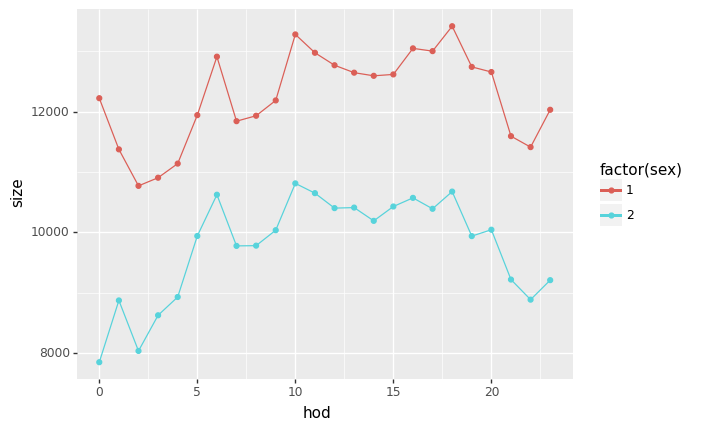

<ggplot: (706404852)>

In [122]:
from plotnine import *
ggplot(data_grp, aes(x="hod", y="size", color="factor(sex)")) + geom_point() + geom_line()

### 6.2 Count the number of deaths in each hour

We need to tidy the data by `hod` and `cod` to get the number of deaths in each hour. Before we do that, we can use `df.query()` to check what result we will get. For example, there should be five records of hod=0, and cod=A06.

In [134]:
data.query("hod == 0 and cod == 'A06'")

        sex  age   yod  mod  dod  hod  cod
19640     2   88  2008    1   10    0  A06
298031    1   56  2008   12   28    0  A06
395562    2   22  2008   12   20    0  A06
412156    1   83  2008    1    5    0  A06
502497    1    2  2008    7   19    0  A06

Then use `df.groupby()` to group the data by `hod` and `cod` and aggregate the data by `size` to count the number of deaths. We should see "5" in the `freq_by_hodcod` column as we queried above.

In [125]:
data_grp = data.groupby(["hod", "cod"]).agg(freq_by_hodcod=("hod", "size")).reset_index()
data_grp

       hod  cod  freq_by_hodcod
0        0  A02               1
1        0  A04               6
2        0  A06               5
3        0  A09              87
4        0  A15               7
...    ...  ...             ...
16171   23  Y34              28
16172   23  Y57               3
16173   23  Y83               7
16174   23  Y86              16
16175   23  Y89               5

[16176 rows x 3 columns]

It is equivalent to use `lambda` function to define the counting function.

In [164]:
data_grp = data.groupby(["hod", "cod"]).agg(freq_by_hodcod=("hod", lambda x: len(x))).reset_index()
data_grp

       hod  cod  freq_by_hodcod
0        0  A02               1
1        0  A04               6
2        0  A06               5
3        0  A09              91
4        0  A15               7
...    ...  ...             ...
16702   99  Y33               2
16703   99  Y34              99
16704   99  Y40               1
16705   99  Y57               3
16706   99  Y86               2

[16707 rows x 3 columns]

### 6.3 The proportion of deaths in each cause by hour

Now, let's continue with the `data_grp` to compute proportion of deaths of each `cod` given `hod`. We need to determine the denominator of the proportion first. The denominator is the total number of deaths in each `cod` across all `hod`.

Again, we can use `df.query()` to preview what we will get.

In [127]:
data_grp.query("cod == 'A03'")

       hod  cod  freq_by_hodcod
5257     8  A03               1
5922     9  A03               1
6611    10  A03               1
8014    12  A03               1
11503   17  A03               1
12204   18  A03               1
14210   21  A03               1

Then use `df.groupby()` to group the data by `cod` and aggregate the data by `sum` to get the total number of deaths in each `cod`.

In [126]:
sum_cod = data_grp.groupby(["cod"]).agg(sum_by_cod=("freq_by_hodcod", "sum")).reset_index()
sum_cod

      cod  sum_by_cod
0     A01          51
1     A02          62
2     A03           7
3     A04         144
4     A05          20
...   ...         ...
1192  Y85           4
1193  Y86         363
1194  Y87           2
1195  Y88           5
1196  Y89          39

[1197 rows x 2 columns]

We use `df.merge()` to merge the `data_grp` and the `sum_cod` to put the sum of deaths in each `cod` into the `data_grp` table.

In [129]:
data_grp2 = pd.merge(data_grp, sum_cod)
data_grp2

       hod  cod  freq_by_hodcod  sum_by_cod
0        0  A02               1          62
1        1  A02               3          62
2        2  A02               9          62
3        3  A02               1          62
4        4  A02               3          62
...    ...  ...             ...         ...
16171   22  Y52               2           2
16172   23  D24               1           1
16173   23  N88               1           1
16174   23  O67               1           1
16175   23  V33               1           1

[16176 rows x 4 columns]

Then, with the columns `freq_by_hodcod` as the numerator and `sum_cod` as the denominator, we can compute the proportion of deaths in each `hod` given `cod`.

In [130]:
data_grp2["prop_by_cod"] = data_grp2["freq_by_hodcod"] / data_grp2["sum_by_cod"]
data_grp2

       hod  cod  freq_by_hodcod  sum_by_cod  prop_by_cod
0        0  A02               1          62     0.016129
1        1  A02               3          62     0.048387
2        2  A02               9          62     0.145161
3        3  A02               1          62     0.016129
4        4  A02               3          62     0.048387
...    ...  ...             ...         ...          ...
16171   22  Y52               2           2     1.000000
16172   23  D24               1           1     1.000000
16173   23  N88               1           1     1.000000
16174   23  O67               1           1     1.000000
16175   23  V33               1           1     1.000000

[16176 rows x 5 columns]

### 6.4 The proportion of deaths in each hour

Next, to know if a cause of death has unusual temporal patterns, we need to compare the proportion of deaths in each hour with the proportion of deaths in each hour across all causes of death. We can use the `data_grp` to compute the sum of deaths in each hour first.

In [131]:
sum_hod = data_grp2.groupby(["hod"]).agg(sum_by_hod=("freq_by_hodcod", "sum")).reset_index()
sum_hod

    hod  sum_by_hod
0     0       20072
1     1       20248
2     2       18806
3     3       19532
4     4       20069
5     5       21883
6     6       23536
7     7       21619
8     8       21713
9     9       22223
10   10       24093
11   11       23627
12   12       23172
13   13       23058
14   14       22786
15   15       23047
16   16       23622
17   17       23395
18   18       24093
19   19       22681
20   20       22702
21   21       20813
22   22       20298
23   23       21240

Then, we sum the `sum_by_hod` to obatain the total number of deaths as the denominator.

In [133]:
sum_hod["sum"] = sum_hod["sum_by_hod"].sum()
sum_hod

    hod  sum_by_hod     sum
0     0       20072  528328
1     1       20248  528328
2     2       18806  528328
3     3       19532  528328
4     4       20069  528328
5     5       21883  528328
6     6       23536  528328
7     7       21619  528328
8     8       21713  528328
9     9       22223  528328
10   10       24093  528328
11   11       23627  528328
12   12       23172  528328
13   13       23058  528328
14   14       22786  528328
15   15       23047  528328
16   16       23622  528328
17   17       23395  528328
18   18       24093  528328
19   19       22681  528328
20   20       22702  528328
21   21       20813  528328
22   22       20298  528328
23   23       21240  528328

Finally, we can compute the proportion of deaths in each hour.

In [134]:
sum_hod["prop_by_hod"] = sum_hod["sum_by_hod"] / sum_hod["sum"]
sum_hod = sum_hod.loc[:, ["hod", "sum_by_hod", "prop_by_hod"]]
sum_hod

    hod  sum_by_hod  prop_by_hod
0     0       20072     0.037992
1     1       20248     0.038325
2     2       18806     0.035595
3     3       19532     0.036969
4     4       20069     0.037986
5     5       21883     0.041419
6     6       23536     0.044548
7     7       21619     0.040920
8     8       21713     0.041098
9     9       22223     0.042063
10   10       24093     0.045602
11   11       23627     0.044720
12   12       23172     0.043859
13   13       23058     0.043643
14   14       22786     0.043129
15   15       23047     0.043623
16   16       23622     0.044711
17   17       23395     0.044281
18   18       24093     0.045602
19   19       22681     0.042930
20   20       22702     0.042970
21   21       20813     0.039394
22   22       20298     0.038419
23   23       21240     0.040202

Again, we can use `df.merge()` to concatenate new columns in `sum_hod` to the `data_grp2` table.

In [135]:
data_grp3 = pd.merge(data_grp2, sum_hod)
data_grp3

       hod  cod  freq_by_hodcod  sum_by_cod  prop_by_cod  sum_by_hod  \
0        0  A02               1          62     0.016129       20072   
1        0  A04               6         144     0.041667       20072   
2        0  A06               5          88     0.056818       20072   
3        0  A09              87        3111     0.027965       20072   
4        0  A15               7         209     0.033493       20072   
...    ...  ...             ...         ...          ...         ...   
16171   23  N95               1           2     0.500000       21240   
16172   23  D24               1           1     1.000000       21240   
16173   23  N88               1           1     1.000000       21240   
16174   23  O67               1           1     1.000000       21240   
16175   23  V33               1           1     1.000000       21240   

       prop_by_hod  
0         0.037992  
1         0.037992  
2         0.037992  
3         0.037992  
4         0.037992  
...      

Check if we got the same result as the tidy paper.

In [136]:
data_grp3.query("cod in ['B16', 'E84', 'I21'] and hod == 8")

      hod  cod  freq_by_hodcod  sum_by_cod  prop_by_cod  sum_by_hod  \
5271    8  B16               4         106     0.037736       21713   
5397    8  E84               3         111     0.027027       21713   
5446    8  I21            2167       47510     0.045611       21713   

      prop_by_hod  
5271     0.041098  
5397     0.041098  
5446     0.041098  

### 6.5 Deviation from the expected proportion

Finally, we can compute the deviation from the expected proportion (`prop_by_hod`)

In [138]:
data_grp3["diff_prop"] = (data_grp3["prop_by_cod"] - data_grp3["prop_by_hod"])**2
data_grp3.head()

   hod  cod  freq_by_hodcod  sum_by_cod  prop_by_cod  sum_by_hod  prop_by_hod  \
0    0  A02               1          62     0.016129       20072     0.037992   
1    0  A04               6         144     0.041667       20072     0.037992   
2    0  A06               5          88     0.056818       20072     0.037992   
3    0  A09              87        3111     0.027965       20072     0.037992   
4    0  A15               7         209     0.033493       20072     0.037992   

   diff_prop  
0   0.000478  
1   0.000014  
2   0.000354  
3   0.000101  
4   0.000020  

And we can follow the same process as the tidy paper to get the distance from the expected proportion.

In [139]:
devi = data_grp3.groupby(["cod"]).agg(n=("freq_by_hodcod", lambda x: x.sum()),
                                      dist=("diff_prop", lambda x: x.mean())).reset_index()
devi = devi.query("n > 50")
devi

      cod     n      dist
0     A01    51  0.000958
1     A02    62  0.000733
3     A04   144  0.000185
5     A06    88  0.000360
8     A09  3111  0.000030
...   ...   ...       ...
1172  Y33    60  0.000627
1173  Y34   780  0.000068
1183  Y57   111  0.000284
1190  Y83   174  0.000203
1193  Y86   363  0.000094

[450 rows x 3 columns]

Now let's do a visualization!

In [140]:
from plotnine import *

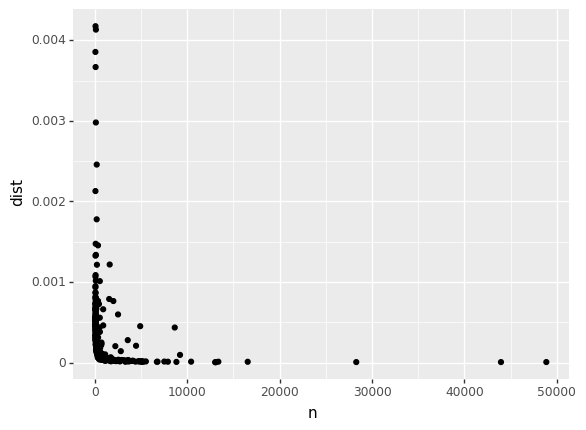

<ggplot: (401325638)>

In [181]:
ggplot(devi, aes(x = 'n', y = 'dist')) + geom_point()

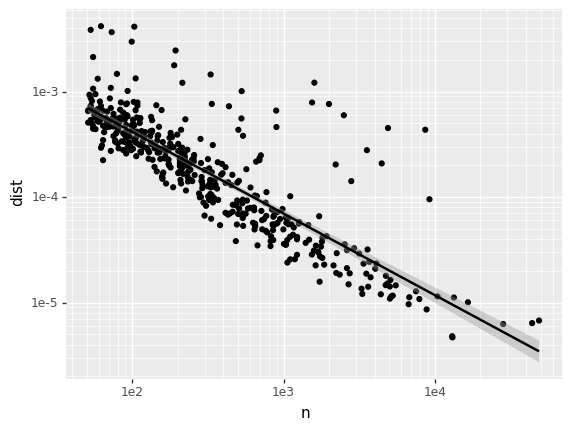

<ggplot: (401161954)>

In [186]:
ggplot(devi, aes(x = 'n', y = 'dist')) + geom_point()+\
scale_x_log10() +\
scale_y_log10() +\
geom_smooth(method = "lm")

### 6.6 Use a residual plot to find unusual temporal patterns

We can use how well the data fit a linear model to find unusual temporal patterns. We need `statsmodels` to fit a linear model. As we learned from the previous visualization, the data are linearly related when the variables are log-transformed. Hence, we can directly fit a linear model on the log-transformed data.

In [154]:
# fit a linear model
import statsmodels.api as sm
import numpy as np
# log transformation
devi["log_n"] = np.log(devi["n"])
devi["log_dist"] = np.log(devi["dist"])
# fit a linear model
model = sm.OLS.from_formula("log_dist ~ log_n", data=devi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_dist   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1348.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          3.74e-137
Time:                        17:54:58   Log-Likelihood:                -436.72
No. Observations:                 450   AIC:                             877.4
Df Residuals:                     448   BIC:                             885.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0754      0.130    -31.270      0.000      -4.332      -3.819
log_n         -0.8050      0.022    -36.712      0.000      -0.848      -0.762
==============================================================================
Omnibus:                      243.413   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1486.742
Skew:                           2.343   Prob(JB):                         0.00
Kurtosis:                      10.572   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Put the fitted residuals into the `devi` dataframe.

In [155]:
# get the residual
devi["resid"] = result.resid
devi

      cod     n      dist     log_n   log_dist     resid
0     A01    51  0.000958  3.931826  -6.950290  0.290330
1     A02    62  0.000733  4.127134  -7.218939  0.178910
3     A04   144  0.000185  4.969813  -8.596625 -0.520395
5     A06    88  0.000360  4.477337  -7.929282 -0.249510
8     A09  3111  0.000030  8.042699 -10.422575  0.127419
...   ...   ...       ...       ...        ...       ...
1172  Y33    60  0.000627  4.094345  -7.373953 -0.002500
1173  Y34   780  0.000068  6.659294  -9.596346 -0.160034
1183  Y57   111  0.000284  4.709530  -8.165902 -0.299207
1190  Y83   174  0.000203  5.159055  -8.501431 -0.272856
1193  Y86   363  0.000094  5.894403  -9.270435 -0.449883

[450 rows x 6 columns]

Visualization: Use an arbitrary threshold, 1.5, to identify unusual temporal patterns.

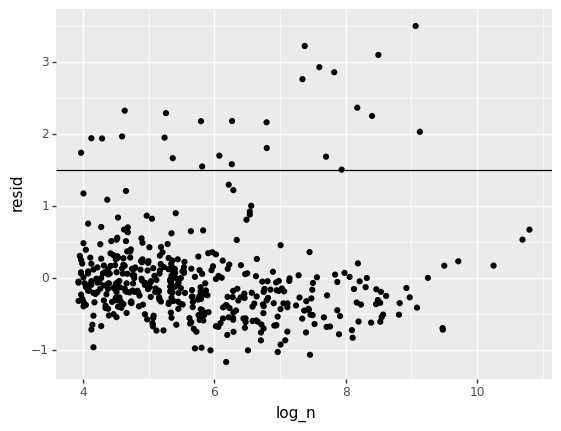

<ggplot: (710113250)>

In [199]:
ggplot(devi, aes(x = 'log_n', y = 'resid')) + geom_point() + geom_hline(yintercept = 1.5)

### 6.7 Visualize the unusual temporal patterns

Map the `cod` code to the full name of the cause of death.

In [147]:
map_cod = pd.read_csv("tidy_X_map_cod.csv")
map_cod.columns = ["cod", "cod_name"]
map_cod

      cod                                           cod_name
0     A00                                            Cholera
1     A01                     Typhoid and paratyphoid fevers
2     A02                        Other salmonella infections
3     A03                                        Shigellosis
4     A04              Other bacterial intestinal infections
...   ...                                                ...
1853  Y85                    Sequelae of transport accidents
1854  Y86                        Sequelae of other accidents
1855  Y87  Sequelae of intentional self harm, assault, an...
1856  Y88  Sequelae with surgical and medical care as ext...
1857  Y89                  Sequelae of other external causes

[1858 rows x 2 columns]

In [156]:
devi2 = pd.merge(devi, map_cod)
devi2.head()

   cod     n      dist     log_n   log_dist     resid  \
0  A01    51  0.000958  3.931826  -6.950290  0.290330   
1  A02    62  0.000733  4.127134  -7.218939  0.178910   
2  A04   144  0.000185  4.969813  -8.596625 -0.520395   
3  A06    88  0.000360  4.477337  -7.929282 -0.249510   
4  A09  3111  0.000030  8.042699 -10.422575  0.127419   

                                            cod_name  
0                     Typhoid and paratyphoid fevers  
1                        Other salmonella infections  
2              Other bacterial intestinal infections  
3                                          Amebiasis  
4  Diarrhea and gastroenteritis of infectious origin  

Put the fitted information into the hour-level data, `data_grp3`.

In [157]:
data_grp3.head()

   hod  cod  freq_by_hodcod  sum_by_cod  prop_by_cod  sum_by_hod  prop_by_hod  \
0    0  A02               1          62     0.016129       20072     0.037992   
1    0  A04               6         144     0.041667       20072     0.037992   
2    0  A06               5          88     0.056818       20072     0.037992   
3    0  A09              87        3111     0.027965       20072     0.037992   
4    0  A15               7         209     0.033493       20072     0.037992   

   diff_prop  
0   0.000478  
1   0.000014  
2   0.000354  
3   0.000101  
4   0.000020  

In [158]:
data_grp4 = pd.merge(data_grp3, devi2, on=["cod"])
data_grp4.head(10)

   hod  cod  freq_by_hodcod  sum_by_cod  prop_by_cod  sum_by_hod  prop_by_hod  \
0    0  A02               1          62     0.016129       20072     0.037992   
1    1  A02               3          62     0.048387       20248     0.038325   
2    2  A02               9          62     0.145161       18806     0.035595   
3    3  A02               1          62     0.016129       19532     0.036969   
4    4  A02               3          62     0.048387       20069     0.037986   
5    5  A02               2          62     0.032258       21883     0.041419   
6    6  A02               2          62     0.032258       23536     0.044548   
7    7  A02               2          62     0.032258       21619     0.040920   
8    8  A02               1          62     0.016129       21713     0.041098   
9    9  A02               3          62     0.048387       22223     0.042063   

   diff_prop   n      dist     log_n  log_dist    resid  \
0   0.000478  62  0.000733  4.127134 -7.218939  0

Visualization

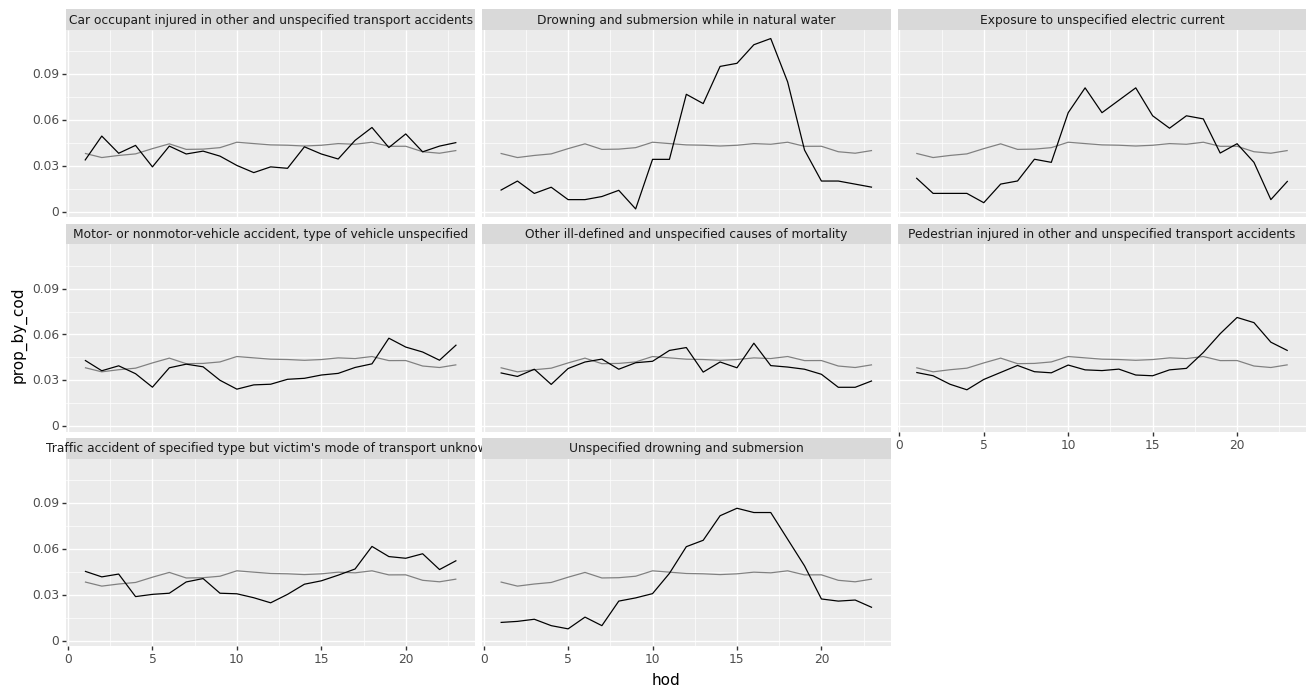

<ggplot: (707506116)>

In [159]:
data_vis = data_grp4.query("n > 350 and (hod > 0 and hod < 24) and resid > 1.5").iloc[:184]
# set figure size
ggplot(data_vis, aes(x = 'hod', y = 'prop_by_cod')) +\
    geom_line(aes(y = "prop_by_hod"), colour = "grey") +\
    geom_line() +\
    facet_wrap('~cod_name', ncol = 3) +\
    theme(figure_size=(16, 8))